In [1]:
!pip install opendatasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: thakshakarathnayake
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight


100%|██████████| 20.3k/20.3k [00:00<00:00, 45.2MB/s]

In [4]:
data = pd.read_csv("/content/male-female-height-and-weight/Test set.csv")

In [5]:
data.head(5)

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [6]:
data.loc[data["Sex"] == "Male", "Sex"] = 1
data.loc[data["Sex"] == "Female", "Sex"] = 0

In [7]:
data.head(5)

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [8]:
x = data.drop(['Sex'], axis=1) # Drop sex column
y = data["Sex"]

In [9]:
x.head(5)

,Height,Weight
0,146.323241,59.861065
1,175.695412,77.863687
2,183.216164,72.131992
3,184.245269,77.546000
4,132.302261,55.188496


In [10]:
y[:5]

,Sex
0,0
1,1
2,1
3,1
4,0


In [23]:
y = y.astype('int')

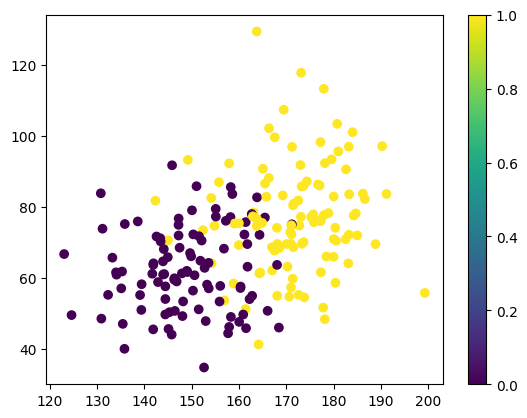

In [24]:
plt.scatter(x['Height'], x['Weight'], c=y)
plt.colorbar()
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
x_train.shape, x_test.shape

((164, 2), (41, 2))

In [27]:
data.shape

(205, 3)

# Model Building

In [29]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

# Train the model
epoch_number = 10
history = model.fit(x_train, y_train, epochs=epoch_number)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4634 - loss: 41.6976  
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4680 - loss: 26.7997 
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4625 - loss: 12.9852 
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4982 - loss: 2.1369 
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5294 - loss: 5.6127 
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5077 - loss: 4.0072 
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3726 - loss: 1.7024 
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4995 - loss: 1.8477 
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5305 - loss: 1.3294 
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5213 - loss: 0.8077 


In [30]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53 (216.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 36 (148.00 B)

# Model Evaluate

In [32]:
model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4548 - loss: 0.8405


[0.8483392000198364, 0.46341463923454285]

In [33]:
y_prediction = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [34]:
y_prediction[:5]

array([[0.2699535 ],
       [0.4196059 ],
       [0.27830568],
       [0.5569558 ],
       [0.15466295]], dtype=float32)

In [35]:
y_test[:5]

,Sex
15,0
9,1
100,1
132,0
68,1


In [36]:
# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test, y_prediction)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.25>

In [37]:
# Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_prediction)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.05000000074505806>

In [38]:
history.history

{'accuracy': [0.47560974955558777,
  0.47560974955558777,
  0.47560974955558777,
  0.5121951103210449,
  0.5243902206420898,
  0.5243902206420898,
  0.40243902802467346,
  0.5243902206420898,
  0.5243902206420898,
  0.5121951103210449],
 'loss': [38.73954772949219,
  24.781436920166016,
  10.83720588684082,
  2.6516664028167725,
  5.70084810256958,
  3.3413515090942383,
  2.162536859512329,
  1.4609627723693848,
  1.3257828950881958,
  0.8490385413169861]}

<Axes: >

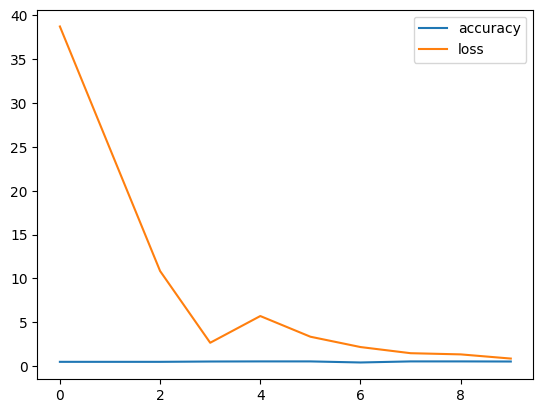

In [39]:
pd.DataFrame(history.history).plot()

# Improve the Model

In [79]:
# Normalize data (normalizing data means scaling the data so that all features are on a similar range)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns=['Height', 'Weight'])

In [57]:
x.head(5)

,Height,Weight
0,0.305685,0.265457
1,0.690767,0.455592
2,0.789367,0.395057
3,0.802859,0.452237
4,0.121865,0.216108


In [58]:
y[:5]

,Sex
0,0
1,1
2,1
3,1
4,0


In [59]:
y = y.astype('int')

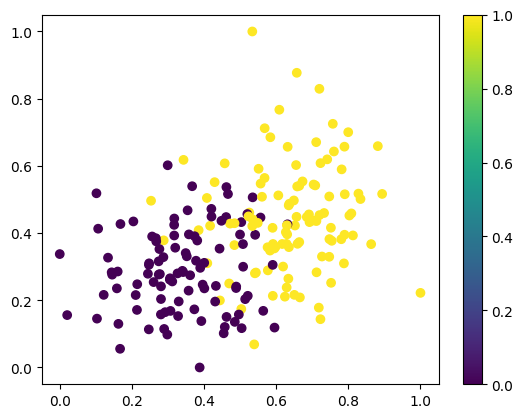

In [60]:
plt.scatter(x['Height'], x['Weight'], c=y)
plt.colorbar()
plt.show()

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [62]:
x_train.shape, x_test.shape

((164, 2), (41, 2))

In [63]:
data.shape

(205, 3)

In [65]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)), # Increase the # of neurons
    tf.keras.layers.Dense(16, activation='relu'), # Add 1 more hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), # Decrease the learning rate
              metrics=['accuracy'])

# Train the model
epoch_number = 20 # Increase the # of epochs
history = model.fit(x_train, y_train, epochs=epoch_number)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4470 - loss: 0.6898
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5402 - loss: 0.6648
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5035 - loss: 0.6579
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5415 - loss: 0.6353
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6299 - loss: 0.5921
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6869 - loss: 0.5803
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8065 - loss: 0.5345 
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8468 - loss: 0.4835 
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8681 - loss: 0.4567 
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8198 - loss: 0.4157 
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8550 - loss: 0.3733 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8442 - loss: 0.3735 
Epoch 13/20
6

In [66]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,749 (14.65 KB)

 Trainable params: 1,249 (4.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,500 (9.77 KB)

# Evaluate the Improved Model

In [67]:
model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8979 - loss: 0.2936 


[0.3054887056350708, 0.8780487775802612]

In [68]:
y_prediction = model.predict(x_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


In [73]:
y_prediction[:5]

array([[0.18620344],
       [0.9808285 ],
       [0.9899173 ],
       [0.3592378 ],
       [0.98131907]], dtype=float32)

In [72]:
y_test[:5]

,Sex
15,0
9,1
100,1
132,0
68,1


In [74]:
# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test, y_prediction)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8260869383811951>

In [76]:
# Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_prediction)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.949999988079071>

In [77]:
history.history

{'accuracy': [0.4695121943950653,
  0.5243902206420898,
  0.5304877758026123,
  0.5609756112098694,
  0.6097561120986938,
  0.7134146094322205,
  0.7987805008888245,
  0.8353658318519592,
  0.8536585569381714,
  0.8292682766914368,
  0.8414633870124817,
  0.8658536672592163,
  0.8719512224197388,
  0.8536585569381714,
  0.8719512224197388,
  0.8597561120986938,
  0.8597561120986938,
  0.8780487775802612,
  0.8597561120986938,
  0.8475610017776489],
 'loss': [0.6862537264823914,
  0.6672101020812988,
  0.650919497013092,
  0.6302122473716736,
  0.6058653593063354,
  0.5706849694252014,
  0.5254677534103394,
  0.4863685965538025,
  0.4545598030090332,
  0.4124690592288971,
  0.3754562735557556,
  0.35321706533432007,
  0.33003994822502136,
  0.30796152353286743,
  0.29914480447769165,
  0.29288846254348755,
  0.2892473638057709,
  0.2893548905849457,
  0.2808375060558319,
  0.29058802127838135]}

<Axes: >

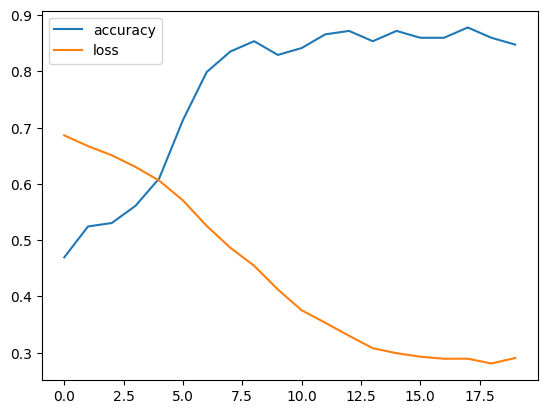

In [78]:
pd.DataFrame(history.history).plot()

# Multi Class Classification

In [80]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax') # Increase the # of neurons and change the activation function to softmax
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Change loss function to Sparse Categorical Cross Entropy
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics=['accuracy'])

# Train the model
epoch_number = 20
history = model.fit(x_train, y_train, epochs=epoch_number)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5563 - loss: 0.6731
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5188 - loss: 0.6460 
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6021 - loss: 0.5928 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7749 - loss: 0.5520 
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7963 - loss: 0.5069 
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8317 - loss: 0.4454  
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8449 - loss: 0.4142  
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8460 - loss: 0.3995 
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8766 - loss: 0.3588 
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8274 - loss: 0.3473 
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8613 - loss: 0.3039 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8737 - loss: 0.2773 
Epoch 13/20

In [83]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,800 (14.85 KB)

 Trainable params: 1,266 (4.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,534 (9.90 KB)

In [85]:
model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9141 - loss: 0.2608


[0.2733660936355591, 0.9024389982223511]

In [86]:
y_prediction = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [89]:
y_prediction[:5]

array([[0.83160406, 0.16839595],
       [0.01903354, 0.98096645],
       [0.00874936, 0.99125063],
       [0.74386257, 0.25613752],
       [0.04801182, 0.9519883 ]], dtype=float32)

In [91]:
import numpy as np
y_prediction = np.argmax(y_prediction, axis=1)
y_prediction[:5]

array([0, 1, 1, 0, 1])

In [93]:
y_test[:5]

,Sex
15,0
9,1
100,1
132,0
68,1
